<h1> Multi Label Classification </h1>

In [8]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,r2_score
from sklearn import multioutput

In [3]:
"""
Multi-Label Classification is a classification task labeling each sample with m labels from
 n_classes possible classes,
"""

'\nMulti-Label Classification is a classification task labeling each sample with m labels from\n n_classes possible classes,\n'

In [18]:
import sklearn.datasets
X,y = sklearn.datasets.make_multilabel_classification(n_samples=100,n_features=20,n_classes=5)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:5], y_train[:5]

(array([[4., 5., 0., 1., 3., 1., 4., 2., 1., 1., 1., 4., 2., 3., 3., 2.,
         5., 6., 2., 2.],
        [1., 0., 6., 0., 4., 0., 3., 4., 1., 3., 1., 0., 9., 2., 2., 4.,
         3., 4., 4., 0.],
        [1., 2., 0., 0., 2., 3., 1., 4., 1., 3., 1., 0., 4., 2., 2., 4.,
         1., 1., 2., 2.],
        [2., 1., 0., 0., 0., 5., 5., 4., 4., 4., 3., 1., 0., 1., 2., 6.,
         5., 2., 3., 2.],
        [2., 4., 1., 2., 2., 1., 0., 2., 3., 2., 1., 0., 5., 3., 0., 2.,
         1., 1., 4., 2.]]),
 array([[1, 1, 1, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 1, 0, 0, 1],
        [0, 1, 1, 0, 0],
        [0, 1, 0, 0, 0]]))

In [19]:
clf = sklearn.linear_model.LogisticRegression()
clf = multioutput.MultiOutputClassifier(clf).fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.25

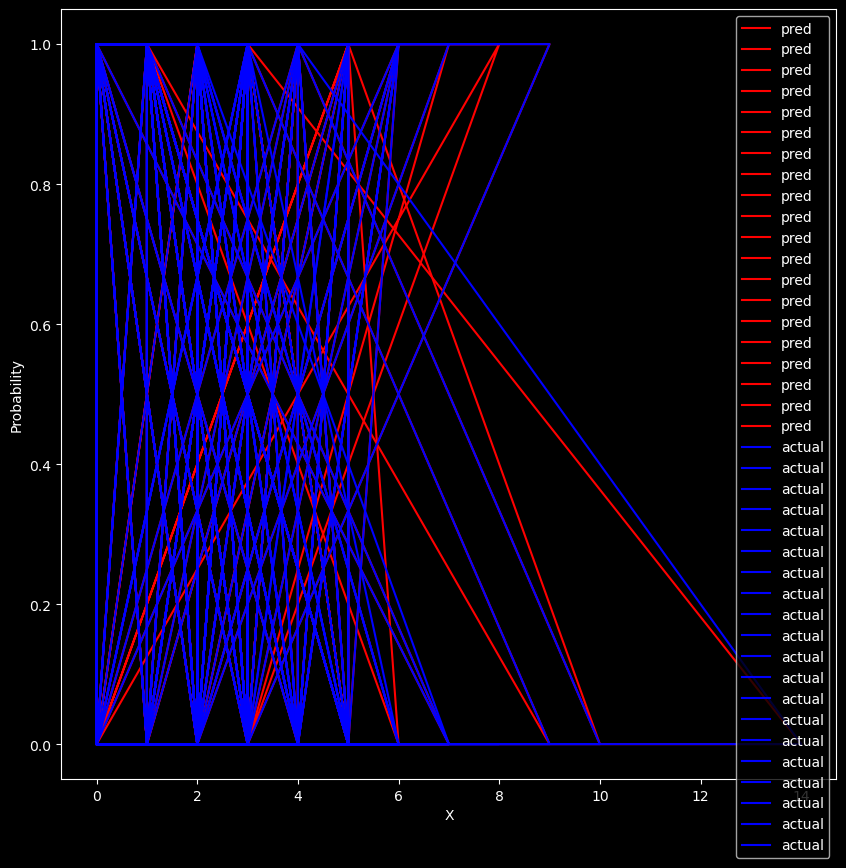

In [25]:
classes = ['class 1','class 2','class 3','class 4','class 5']
# Plot predicted probabilities
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i, class_label in enumerate(classes):
    probabilities = np.array([pred[i] for pred in y_pred])
    tests = np.array([pred[i] for pred in y_test])
    ax.plot(X_test, probabilities, label="pred", color="red")
    ax.plot(X_test, tests, label="actual", color="blue")
    break

ax.set_xlabel('X')
ax.set_ylabel('Probability')
ax.legend()

Multioutput regression is same as the classifier but a regressor instead, key thing is multiple classes possible for a single sample

<h2> Classifier Chain </h2>

In [43]:
# clf = sklearn.linear_model.LogisticRegression()
# clf = multioutput.MultiOutputClassifier(clf).fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# accuracy_score(y_test,y_pred)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# OneVsRestClassifier
y_ovr = multioutput.MultiOutputClassifier(clf).fit(X_train, y_train).predict(X_test)

# Now do the same with ClassifierChain
chains = [multioutput.ClassifierChain(clf, order='random', random_state=i) for i in range(5)]

for chain in chains:
    chain.fit(X_train, y_train)

y_pred_chains = np.array([chain.predict_proba(X_test) for chain in chains])
y_pred_chains[:5]

array([[[1.63808487e-01, 5.38179661e-01, 3.11558589e-02, 2.29969994e-01,
         5.75832870e-01],
        [1.07246974e-01, 6.77243930e-01, 1.02559041e-03, 1.60517570e-04,
         7.35602438e-01],
        [2.67272412e-01, 9.98943634e-01, 7.13738625e-01, 4.08479474e-05,
         2.66393816e-01],
        [2.76649587e-01, 1.35280434e-01, 8.15628498e-02, 2.12930729e-03,
         1.19056328e-02],
        [6.16051427e-02, 8.08309710e-01, 7.26289240e-03, 3.13045352e-05,
         5.70785127e-01],
        [2.62088685e-02, 7.98788909e-01, 4.14180868e-03, 1.12380106e-03,
         5.80640180e-01],
        [4.90986044e-04, 3.90810538e-01, 1.36825164e-03, 4.38663187e-04,
         9.99989778e-01],
        [9.15276898e-01, 9.87415395e-01, 9.66841039e-01, 1.02128803e-04,
         1.43292871e-01],
        [2.86277767e-01, 1.50892872e-01, 6.06546762e-01, 2.84783728e-07,
         9.99872915e-01],
        [7.92399441e-01, 9.72702165e-01, 2.40410070e-02, 4.21240629e-04,
         6.14879032e-01],
        [9

In [44]:
from sklearn.metrics import jaccard_score

# ovr -> OneVsRest
ovr_jaccard_score = jaccard_score(y_test, y_ovr, average="samples")

chain_jaccard_scores = [
    jaccard_score(y_test, y_pred_chain >= 0.5, average="samples")
    for y_pred_chain in y_pred_chains
]

Y_pred_ensemble = y_pred_chains.mean(axis=0)
ensemble_jaccard_score = jaccard_score(y_test, Y_pred_ensemble >= 0.5, average="samples")
model_scores = [ovr_jaccard_score] + chain_jaccard_scores + [ensemble_jaccard_score]

model_names = (
    "OVR",
    "Chain 1",
    "Chain 2",
    "Chain 3",
    "Chain 4",
    "Chain 5",
    "Ensemble",
)

/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in samples with no true or predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

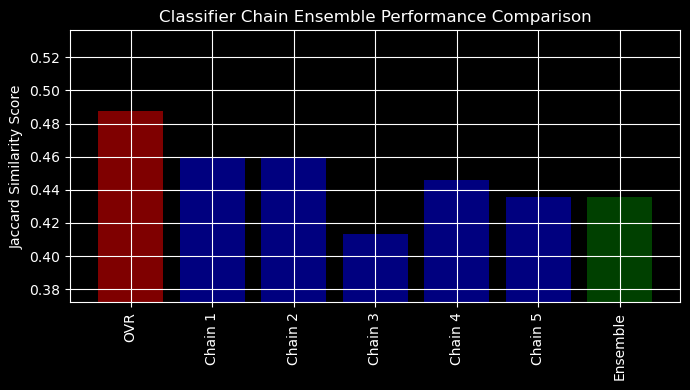

In [45]:
x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title("Classifier Chain Ensemble Performance Comparison")
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation="vertical")
ax.set_ylabel("Jaccard Similarity Score")
ax.set_ylim([min(model_scores) * 0.9, max(model_scores) * 1.1])
colors = ["r"] + ["b"] * len(chain_jaccard_scores) + ["g"]
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()

In [49]:
np.array([[1,2,3],[4,5,6]]).mean(axis=0)

array([2.5, 3.5, 4.5])